# Classification

## MNIST

* MNIST, ABD nufus burosunda çalışanlar ve lise öğrencileri tarafından elle yazılmış rakamların küçük görüntülerinden(70.000 adet) oluşan bir veri setidir
* Her görüntü,temsil ettiği rakamla etiketlenmiştir.
* Bu veri seti o kadar çok incelenmiştir ki,genellikle makine öğrenmesinin(machine learning) "merhaba dünya" örneği olarak adlandırılır
* insanlar yeni bir sınıflandırma algoritması geliştirdiklerinde, bunun MNIST üzerinde nasıl bir performans göstereceğini merak ederler, ayrıca makine öğrenmesini öğrenen herkes bu veri setiyle çalışır
* sklearn popüler veri setlerini indirmek için birkaç yardımcı fonksiyon(helper function) sağlar.

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784)),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',


* sklearn.datasets paketi(package) genellikle 3 tür fonksiyon içerir
* "fetch_*" fonksiyonları(fetch_openml() gibi),gerçek hayattaki veri setlerini indirmek için kullanılır
* "load_*" fonksiyonları, sklearn ile birlikte gelen küçük mrnek veri setlerini yükler.bu veri setleri internetten indirilmeden doğrudan kullanılır
* "make_*" fonksiyonları ise testlerde kulalnmak için sahte veri setleri oluşturur

* ------------------------------------------------------------------
* oluşturulan(generated) veri setleri genellikle input data ve targets içeren(X,y) ikilisi(tuple) olarak döner,her ikisi de Numpy dizisi biçimindedir
* diğer veri setleri ise "sklearn.utils.Bunch" nesneleri olarak döner.Bunlar anahtar-değer çiftleri(dict) şeklinde olup,girdilere öznitelik(attribute) olarak da erişilebilir.
* genellikle şu ögeleri(entries) içerirler

* "DESCR"-Veri setinin açıklaması
* "data"-Giriş verileri(input data),genellikle 2 boyutlu bir numpu dizisi
* "target"-Etiketler(labels),genellikle 1 boyutlu numpy dizisi

* fetch_openml() fonksiyonu biraz farklıdır. çünkü varsayılan olarak girdileri bir Pandas DataFrame olarak ,etiketleri ise bir PandasSeries olarak döndürür
* Ancak MNIST veri seti görüntüler(images) içerdiğinden,DataFrame yapısı bu tür veriler için ideal değildir.
* Bu nedenle verileri numpy dizileri olarak almak için as_frame=False parametresini ayarlamak tercih edilir

In [2]:
X,y=mnist.data,mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [3]:
X.shape

(70000, 784)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

In [5]:
y.shape

(70000,)

* toplam 70.000 görüntü vardır ve her bir görüntü 784 özelliğe(feature) sahiptir.Bunun nedeni her görüntünün 28x28 piksel boyutunda olmasıdır.
* her bir özellik bir pikselin yoğunluğunu(pixel intensity) temsil eder.0 beyazı,255 ise siyahı ifade eder
* veri setinden bir rakama göz atmak için yapmamız gereken bir örneğin(instance) özellik vektörünü(feature vector) almak ve bunu 28x28 boyutunda bir diziye yeniden şekillendirmek ve matplotlib'in imshow() fonksiyonunu kullanarak görüntülemektir
* cmap="binary" parametresi 0'in beyazı ve 255'in siyahı temsil ettiği gri tonlamalı(grayscale) bir colormap oluşturur

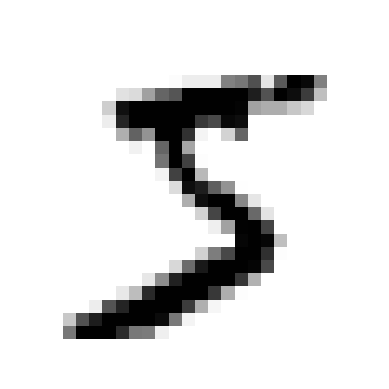

In [6]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image,cmap="binary")
    plt.axis("off")

some_digit=X[0] #5
plot_digit(some_digit)
plt.show()

In [7]:
y[0]

'5'

* rakam şekillerinde oldukça falza çeşitlilik vardır
* görüntüler temizdir,iyi ortalanmıştır, fazla döndürülmemiştir ve tüm rakamlar yaklaşık olarak aynı boyuttadur. Bu nedenle bu veri wseti fazla on işleme(preprocessing) gerektirmez.
* veriyi yakından incelemeye başlamadan önce her zaman bir test seti oluşturulmalı ve kenara ayırmalıyız
* fetch_openml() tarafından döndürülen MNIST veri seti, aslında zaten ikiye ayrılmıştır

* Eğitim seti(trainin set):İlk 60.000 görüntü
* Test seti:Son 10.000 görüntü

In [8]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

* Eğitim seti karıştırılmıştır(shuffled)
* bazı öğrenme algoritmaları,eğitim örneklerinin sırasına duyarlıdır. eğer art arda çok benzer örnekler alırlarsa kötü performans gösterebilirler
* veri setinin karıştırılması bu durumun yaşanmasını önler

## Training a Binary Classifier(İkili Sınıflandırıcıyı Eğitmek)
* şimdilik problemi basitleştirelim ve sadece tek bir rakamı tanımlamayı deneyelim.örneğin 5 rakamını
* bu 5 dedektörü sadece ikili sınıfı ayırt edebilen bir ikili sınıflandırıcıya örnek olacaktır:5 ve 5 olmayan
* Öncelikle bu sınıflandırma görevi için hedef vektörlerini oluşturalım

In [9]:
y_train_5=(y_train=="5")# 5 olanlar için True diğerleri için False
y_test_5=(y_test=="5")

* şimdi bir sınıflandırıcı(classifier) seçip onu eğitelim.Başlamak için iyi bir seçenek stokastik gradyan inişi(stochastic gradient descent,SDG) kullananan bir sınıflandırıcıdır.Yani sklearnün SGDClassifier sınıfı
* bu sınıflandırıcı çok büyük veri setlerini verimli şekilde işleyebilir.Bunun bir nedeni,SGD'nin eğitim örneklerini(training instances) birbirinden bağımsız olarak,teker teker işlemesidir. Bu özellik SDG'yi çevrimiçi öğrenme(online learning) için de oldukça uygun hale getirir
* Bir SGDClassifier oluşturup onu tüm eğitim seti üzerinde eğitelim

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

* Artık bu modeli 5 rakamının görüntülerini tespit etmek için kullabiliriz

In [11]:
sgd_clf.predict([some_digit])

array([ True])

* Sınıflandırıcı(classifier) bu görüntünün 5'i temsil ettiğini tahmin ediyor(True)
* Görünüşe göre bu örnekte doğru tahminde bulunmuş
* şimdi bu modelin performansını değerlendirelim

## Performance Measures(Performans Ölçütleri)
* Bir sınıflandırıcıyı değerlendirmek,genellikle bir regresyon modelini değerlendirmekten daha zordur.
* Kullanılabilecek bir çok performans ölçütü vardır

### Measuring Accuracy Using Cross-Validation(Çapraz Doğrulama ile Doğruluk Ölçümü)

* Bir modeli değerlendirmenin iyi bir yolu çapraz doğrulama(cross-validation) kullanmaktır
* cross_val_score() fonksiyonunu kullanarak SGDClassifier modelimizi k-katlı(k-fold) çapraz doğrulama ile(k=3) değerlendirelim
* k-fold cross validation eğitim setinin k parçaya bölünmesi,ardından k kez eğitilmesi anlamına gelir
* her seferinde farklı bir fold(kat) değerlendirme(evaluation) için ayrılır

In [12]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_test,y_test_5,scoring="accuracy",cv=3)


array([0.95110978, 0.95439544, 0.96879688])

* tüm cross validation katmanlarında(folds) %95'in üzerinde doğruluk.
* çok fazla heyecanlanmadan önce, sadece her görüntüyü en sık görülen sınıfa(most frequent class) atayan bir basit sınıflandırıcıya(dummy classifier) bakalım
* bu durumda en sık görülen sınıf, negatif sınıf yani 5 olmayan sınıfıdır

In [13]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
any(dummy_clf.predict(X_train)) #False= 5 bulunmadı

False

In [14]:
cross_val_score(dummy_clf,X_train,y_train_5,scoring="accuracy",cv=3)

array([0.90965, 0.90965, 0.90965])

* bu modelin doğruluğu %90'ın üzerinde
* bunun nedeni görüntülerin sadece yaklaşık %10'u 5 rakamına ait,dolayısıyla her görüntü için "5 değil" tahmininde bulunursak, %90 oranında doğru tahminde bulunuruz
* bu durum doğruluğun(accuracy) neden sınıflandırıcılar için genellikle tercih edilen performans ölçütü olmadığını açıkca gösterir.
* bir sınıflandırıcının performansını değerlendirmek için çok daha iyi bir yöntem karmaşıklık matrisi(confusion matrix) kullanmaktır

### Confusion Matrices
* Karmaşıklık matrisinin genel fikri, her A/B sınıf çifti(class pair) için A sınıfına ait örneklerin kaç kez B sınıfı olarak sınıflandırıldığını saymaktır
* örneğin sınıflandırıcının(classifier) 8 rakamına ait görüntüleri kaç kez 0 olarak karıştırdığını(confused) öğrenmek istersek,karmaşık matrisinin 8. satırındaki(row 8) ve 0.sutunundaki(column 0) değere bakarız
* Karmaşıklık matrisini hesaplamak için önce,gerçek hedeflere(actual targets) karşılaştırabileceğin bir tahmin kümesini ihtiyaç vardır
* Bu tahminleri test seti üzerinde yapabiliriz ancak test setine şimdilik dokunmamak en iyisidir.
* Bunun yerine cross_val_predict() kullanabiliriz

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

* Tıpkı cross_val_score() fonksiyonu gibi,cross_val_predict() de k-katlı cross validation uygular.ancak değerlendirme skorlarını döndürmek yerine her test fold'u üzerinde yapılan tahminleri döndürür
* bu, eğitim setindeki her bir örnek(instance) için temiz bir tahmin elde ettiğimiz anlamına gelir
* buradaki temiz ifadesi "örnek dışı(out-of-samples)" demektir.yeni model tahmin yaptığı veriyi eğitim sırasında hiç görmemiştir
* Confusion matrisi kullanmak için fonksiyona hedef sınıflara(y_train_5) ve tahmin edilen sınıfları(y_train_red) verilir

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

* bir karmaşıklık matrisinde her satır(row) gerçek sınıfı(actual class), her sütun(column) ise tahmin edilen sınıfı(predicted class) temsil eder
* bu matrisin ilk satırı 5 olmayan görüntüleri,yani negatif classı ele alır

* 53892 tanesi doğru şekilde non-5 olarak sınıflandırılmıştır(true negatives(doğru negatifler))
* geri kalan 687 tanesi ise yanlış biçimde 5 olarak sınıflandırılmıştır(false positives). aynı zamanda tip 1 hatalar olarak da bilinir

* ikinci satır 5'lere(positive class) ait görüntüler içerir.

* 1.891 tanesi yanlış biçimde non-5  olarak sınıflandırılmıştır.(false negatives)Aynı zamanda tip 2 hatalar
* kalan 3.530 tanesi ise doğru şekilde 5 olarak tanımlanmıştır(true positives)

* kusursuz bir sınıflandırıcı sadece doğru pozitif ve doğru negatif değerlerine sahip olur

In [17]:
y_train_perfect_predictions=y_train_5 #mükemmel bir sonuç elde ettiğimizi varsayalım
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

* karmaşıklık matrisi oldukça fazla bilgi sağlar ancak bazen daha özlü(concise) bir ölçüme ihtiyaç duyabiliriz
* bunlardan biri pozitif tahminlerin doğruluğu-yani sınıflandırıcının kesinliği(precision) olarak adlandırılır

### Precision(kesinlik)
 precision=TP / TP +FP

* TP-> True Pozitif Sayısı
* FP-> False Pozitif Sayısıdır

* Sadece çok yüksek eminlikte(extremely confident) olduğunda pozitif tahmin yapan bir modeli düşünelim
* Bu durumu uç bir senaryoya taşıyalım ve modelin, en emin olduğu tek bir örnej dışında her zaman negatif tahmin yaptığını varsayalım

* eğer bu tek pozitif tahmin doğru ise sınıflandırıcının kesinliği %100 olur(precision 1/1=%100)
* ancak böyle bir sınıflandırıcı pratikte pek işe yaramaz. çünkü birden fazla pozitif örneği tamamen göz ardı eder


### Recall(duyarlılık)
* Bu nedenle precision(kesinlik) genellikle başka bir metrikle birlikte değerlendirilir
* Bu metrik duyarlılık(recall) veya doğru pozitif oranı(true positive rate,TPR)'dır
* recall sınıflandırıcının doğru şekilde tespit ettiği pozitif örneklerin oranıdır. yani pozitif örneklerin ne kadarını yakalayabilidğini gösterir


recall=TP / TP+FN

![b](b.png)




### Kesinlik(Precision) ve Duyarlılık(Recall)
* Sklearn sınıflandırıcı metriklerini hesaplamak için çeşitli fonksiyonlar sağlar. Bunlar arasında precision ve recall'da vardır

In [18]:
cm

array([[53892,   687],
       [ 1891,  3530]])

In [19]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred) #3530/ (687 + 3530)


0.8370879772350012

In [20]:
recall_score(y_train_5,y_train_pred) # 3530 / (3530 + 1891)

0.6511713705958311

* 5 dedektörümüz , cross val'daki  doğruluk(accuracy) açısından baktığımız zamanki kadar etkliyeci görünmüyor
* bir görüntünün 5 olduğunu iddia ettiğimizde %83.7 oranında doğru çıkıyor(precision=0.837)
* üstelik tüm 5'lerin sadece %65.1'ini doğru tespit edebiliyor (recall=0.651)

* genellikle precision ve recall değerlerini tek bir ölçüte(metric) dönüştürmek kullanışlıdır.
* bu birleşik ölçüt f1 score olarak adlandırılı ve iki değerin harmonik ortalaması alınarak hesaplanır

* normal ortalama tüm değerlere eşit ağırlık verirken,harmonik ortalama düşük değerlere daha fazla ağırlık verir.
* bir sınıflandırıcının hem recall hem de precision yüksekse yüksek f1 skoru elde eder

f1= 2 x ((precision x recall) / (precision+recall))
f1 = TP / (TP + ((FN+FP)/2) )

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847

* f1 skoru, precision ve recall değerleri birbirine yakın olan sınıflandırıcıları tercih eder
* ancak bu, her zaman istediğimiz şey olmayabilir, bazı durumlarda precision(kesinlik) daha önemliyken, bazı durumlarda recall(duyarlılık) kritik öneme sahiptir

* örneğin cocuklar için güvenli videoları tespit eden bir sınıflandırıcı eğittiğimizi düşünelim
* bu durumda bir çok iyi videoyu yanlışlıkla reddeden(düşük recall) ama sadece gercekten güvenli olanları kabul eden (yüksek precision) bir model tercih edilir
* çünkü birkaç iyi videoyu kaybetmek,cocukların zararlı içeriklere erişmesinden çok daha iyidir.
* bu gibi durumlarda, hatta sınıflandırıcıların seçtiği videoları gözden geçirmek için insan denetimli(human-in-the-loop) bir adım eklemek bile mantıklı olabilir


* bir de güvenlik kamerası görüntülerinde hırsız tespiti yapan bir sınıflandırıcı geliştirdiğimiz düşünelim
* bu durumda sınıflandırıcının %30 precisiona sahip olması kabul edilebilir, yeter ki %99 recall'a ulaşsın
* güvenlik görevlileri bir kaç yanlış alarm(false positive) alacaktır,ama neredeyse tüm hırsızlar yakalanacaktır
* her iki tarafı aynı anda arttırmak mümkün değildir.precisionu yükseltmek genellikle recall'u düşürür.recall'u yükseltmek ise precisionu azaltır
* bu dengeye precisio/recall trade-off(kesinlik/duyarlılık dengesi) denir

### The Precision/Recall Trade-Off(Kesinlik/Duyarlılık Dengesi)

* bu dengeyi anlamak için, SGDClassifier'ın sınıflandırma kararlarını nasıl verdiğine bakalım
* model her örnek(instance) için bir karar fonksiyonuna(decision function) dayalı olarak puan(score) hesaplar
* bu puan belirlenen eşik değerinden(threshold) büyükse örneği pozitif sınıfa,küçükse negatif sınıfa atar

* soldan sağa doğru, düşük skordan yüksek skora dizilmiş birkaç rakam olduğunu varsayalım
* eşik değerini ortaya yerleştirdiğimizi varsayalım
* bu eşikten sağda 4 doğru pozitif(true pozitives)-yani gerçekten 5 olan örnekler- vardır.ayrıca eşikten sağda 1 yanlış pozitif(false positive)- aslında 6 olan örnek- vardır


* bu durumda precision(kesinlik)= 4/ (4+1)= %80
* precision(duyarlılık)= 4/ (4+2)=%67(çünkü toplamda 6 gerçek "5" vardır ama sadece 4 tanesi tespit edilmiştir)

* sınıflandırıcının (classifier) predict() metodunu çağırmak yerine , decision_function() metodunu kullanabilir
* bu metot her bir örnek(instance) için bir score döndürür
* ardından bu puanları kullanarak,istediğimiz herhangi bir eşik değeri(thresholds) belirleyebilir ve tahminleri bu eşik üzerinden yapabiliriz

In [22]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [23]:
threshold=0
y_some_digit_pred= (y_scores>threshold)
y_some_digit_pred

array([ True])

* SGDClassifier varsayılan olarak 0 eşik değeri kullanır.Bu nedenle önce kod predict() metoduyla aynı sonucu döndürür.eşik değerini yükseltelim

In [24]:
threshold=3000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

* bu durum threshold attırılmasının recall'ı azalttığını doğrular
* görüntü aslında 5 tir ve sınıflandırıcı,eşik değeri 0 iken bunu doğru şekilde tespit eder.
* ancak eşik değeri 3000'e çıktığında model bu örneği kaçırır(5 olarak tanımaz model)
* peki hangi eşik değerini kullanacağımıza nasıl karar veririz..Bir seçenek,cross_val_predict() fonksiyonunu kullanarak eğitim setindeli tüm örneklerin skorunu elde etmektir(ancak bu kez tahminler yerine karar skorlarını(decision scores) döndürmesini belirtmemiz gerekir)

In [25]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [26]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

* bu skorları kullanarak,"precision_recall_curve()" fonksiyonuyla tüm olası eşik değerleri(thresholds) için precision ve recall değerlerini hesaplayabiliriz
* bu fonksiyon ayrıca sonuna bir precision=1 ve recall=0 değeri ekler, bu da sonsuz eşik değerine karşılık gelir

In [27]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

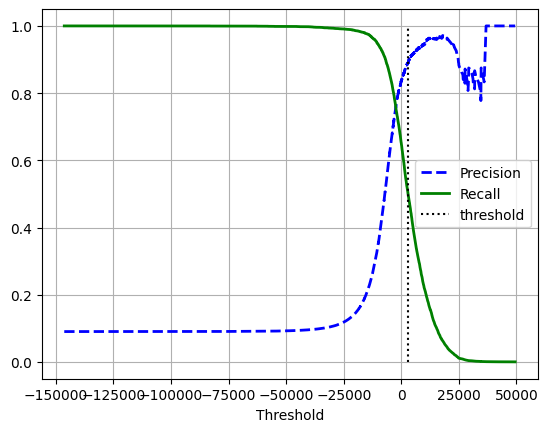

In [28]:
plt.plot(thresholds,precisions[:-1],"b--",label="Precision",linewidth=2)
plt.plot(thresholds,recalls[:-1],"g-",label="Recall",linewidth=2)
plt.vlines(threshold,0,1.0,"k","dotted",label="threshold")
plt.grid(True)
plt.xlabel("Threshold")
plt.legend()
plt.show()

* bu eşik değerinde(0) precision yaklaşık %90 , recall ise yaklaşık %50 civarındadır
* iyi bir precision/recall dengesi seçmenin bir başka yolu da ,precision'u doğrudan recall'a karşı çizmek.

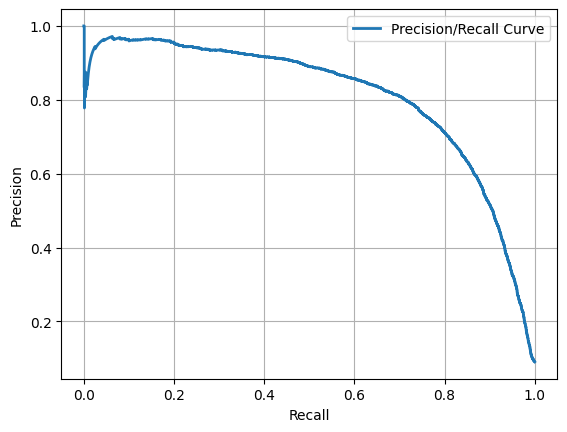

In [29]:
plt.plot(recalls,precisions,linewidth=2,label="Precision/Recall Curve")
plt.grid(True)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

* gördüğümüz gibi recall %80 civarına ulaştığında precision keskin bir şekilde düşmeye başlar
* bu nedenle iyi bir precision/recall dengesi(trade-off) genellikle bu düşüşten hemen önce -yüzde 60 mesela- seçilir
* bu seçim projenin gereksinimlerine bağlıdır

* diyelim ki hedefimiz %90 precision elde etmek olsun
* bunu belirlemek için en az %90 precision sağlayan en düşük eşik değerini(lowest threshold) bulabiliriz
* bunun için numpy dizisinin argmax() fonksiyonunu kullanabilirz.Bu metot dizideki maksimum değerin ilk indexini döndürür
* bu durumda ilk True değerinin indeksinin,yani istenen precision seviyesine(örneğin >= %90) ilk ulaşan eşik değerini verir

In [30]:

idx_for_90_precision=(precisions>=0.90).argmax()
threshold_for_90_precision=thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.019499144185)

* Eğitim seti üzerinde tahmin yapmak için(şimdilik),sınıflandırıcının predict() metodunu çağırmak yerine aşağıdaki kodu çalıştıralım

In [31]:
y_train_pred_90=(y_scores>=threshold_for_90_precision)
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [32]:
#tahminlerin precison ve recall'ı
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [33]:
recall_at_90_precision=recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.4799852425751706

* artık yüzde 90 precision'a sahip bir sınıflandırıcımız var
* ama recall(dyuarlılık) çok düşükse yüksek precision'a sahip bir sınıflandırıcı pek işe yaramaz. Bir çok uygulama için %48 recall oldukça  yetersiz bir sonuç olurdu

## ROC Curve

* ROC Eğrisi(Receiver Operating Characteristic Curve), ikili sınıflandırıcılarla(binary classifiers) birlikte yaygın olarak kullanılan bir araçtır
* precision/recall eğrisini oldukça benzer, ama bu kez precisiona karşı recall yerine,doğru pozitif oranı(recall) yanlış pozitif oranına karşı çizilir
* FPR(False positive rate), yanlış biçimde pozitif sınıflandırılan negatif örneklerin oranıdır(fall-out)


FPR=1-TNR(true negatif rate)

TNR doğru biçimde negatif sınıflandırılan  negatif örneklerin oranıdır ve özgüllük(specificty) olarak adlandırılır

* dolayısıyla ROC eğrisi, duyarlılığı(sensivity/recall), 1-özgüllük(specificty) değerine karşı çizer

* roc eğrisini çizmek için roc_curve() fonksiyonunu kullanarak çeşittli eşik değerleri için TPR ve FPR değerlerini hesaplayabilirz

In [34]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

* daha sonra FPR değerini,TPR'ye karşı çizerek ROC eğrisini oluşturabiliriz
* %90 precision'a karşılık gelen noktayı bulmak için,ilgili threshold indeksini belirlememiz gerekir
* budurumda threshold değerleri azalan sırada listelendiği için,ilk satırda >= yerine <= kullanırız

In [35]:
idx_for_threshold_at_90=(thresholds <= threshold_for_90_precision).argmax()
idx_for_threshold_at_90

np.int64(520)

In [36]:
tpr_90,fpr_90=tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]


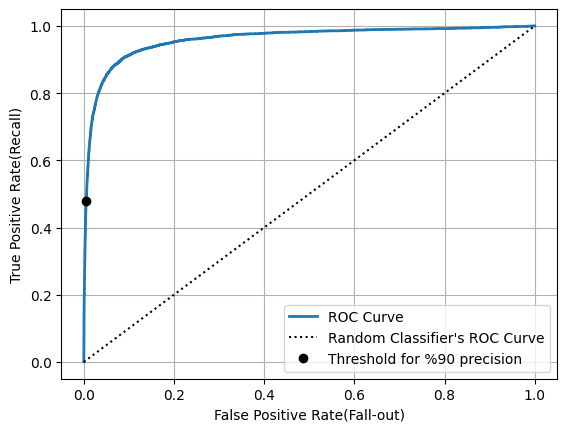

In [37]:
plt.plot(fpr,tpr,linewidth=2,label="ROC Curve")
plt.plot([0,1],[0,1],"k:",label="Random Classifier's ROC Curve")
plt.plot([fpr_90],[tpr_90],"ko",label="Threshold for %90 precision")
plt.xlabel("False Positive Rate(Fall-out)")
plt.ylabel("True Positive Rate(Recall)")
plt.legend()
plt.grid(True)
plt.show()

* yine bir denge(trade-off) söz konusudur.Recall(TPR) arttıkça,sınıflandırıcının ürettiği yanlış pozitiflerin(FPR) sayısı da artar
* noktalı çizgi tamamen rastgele tahmin yapan bir sınıflandırıcının ROC eğrisini temsil eder.
* iyi bir sınıflandırıcı bu çizgiden olabildiğince uzakta(yani sol üst köşeye) yakın olmalıdır

* sınıflandırıcıları karşılaştırmanın bir yolu,eğrinin altındaki alanı(Area Under the Curve(AUC)) ölçmektir.
* kusursuz bir sınıflandırıcı=ROC AUC==1
* tamamen rastgele bir sınıflandırıcı=ROC,AUC==0.5
* sklearni ROC AUC değerini hesaplamak için özel bir fonksiyon sağlar

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

np.float64(0.9604938554008616)

* Şimdi RandomForestClassifier oluşturalım. Böylece RFC'nin PR(precision-recall) eğrisini ve F1 skorunu,SGDClassifier'ın sonuçlarıyla karşılaştıralım

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)

* precision_recall_curve() fonksiyonu,her örnek(instance) için etiketler(labels) ve skorlar(scores) bekler
* bu nedenle önce RandomForestClassifier'ı eğitmemiz ve her örneğe skor atamasını sağlamamız gerekir
* RFC her örnek için tahmini sınıf olasılıklarını döndüren bir predict_proba() metodu vardır
* bu durumda pozitif sınıfa ait olasılığı skor olarak kullanabiliriz. böylece precision_recall_curve() fonksiyonu düzgün şekilde çalışır
* bunu yapmak için cross_val_predict() fonksiyonunu çağırarak RFC'ı çapraz doğrulama ile eğitebilir ve her görüntü için sınıf olasılıklarını tahmin ettirebilirz


In [40]:
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [41]:
y_probas_forest[:2] #eğitim setindeki ilk 2 resmin sınıf olasılıkları

array([[0.11, 0.89],
       [0.98, 0.02]])

* model ilk görüntünün pozitif olma olasılığını %89,ikinci görüntünün ine negatif olma olasılığını %98 olarak tahmin eder

* ikinci sutun pozitif sınıfa ait tahmini olasılıkları içerir. bu nedenle bu sütünu precision_recall_curve() fonksiyonuna argüman olarak geçirebiliriz

In [42]:
y_scores_forest=y_probas_forest[:,1]
precisions_forest,recalls_forest,thresholds_forest=precision_recall_curve(y_train_5,y_scores_forest)

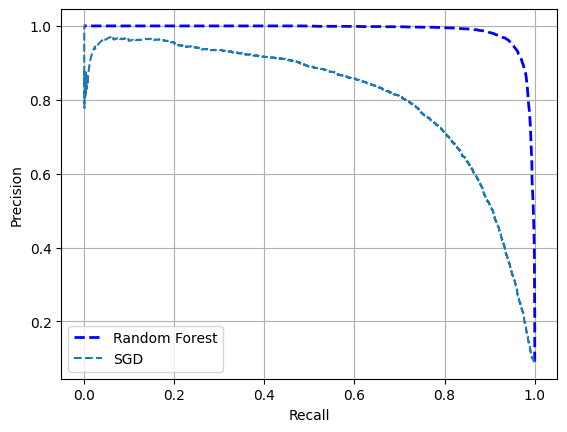

In [43]:
plt.plot(recalls_forest,precisions_forest,"b--",linewidth=2,label="Random Forest")
plt.plot(recalls,precisions,"--",label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

In [44]:
y_train_pred_forest=y_probas_forest[:,1]>=0.5 #positive proba
f1_score(y_train_5,y_train_pred_forest)


0.9270445185330457

In [45]:
roc_auc_score(y_train_5,y_scores_forest)

np.float64(0.9983296721818179)

* RandomForestClassifier'ın PR(precision-recall) eğrisi,SGDClassifier'inkinden daha iyi görünüyor.Eğri grafiğin sağ üst köşesine çok daha yakın ilerler.Aycı modelin f1 ve ROC AUC skoru'da belirgin şekilde daha yüksektir

# Multiclass Classification(Çok Sınıflı Sınıfladırma)
* ikili sınıflandırıcılar(binary classifiers) sadece iki sınıfı ayırt ederken, çok sınıflı sınıflandırıcılar(diğer adıyla multinomial classifiers) ikiden fazla sınıfı birbirinden ayırt edebilir.

* Bazı sklearn sınıflandırıcıları(LogisticRegression,RFC,GaussianNB) çok sınıflı problemleri doğrudan(natively) ele alabilir
* Dİğerleri ise sadece ikili sınıflandırma için tasarlanmıştır(SGDClassifier,SVC). Bu türk ikili sınıflandırıcılarla da çok sınıflı sınıflandırma yapmak mümkündür
* Örneğin rakam görüntülerini 0-9 arasındaki 10 sınıfa ayıran sistem oluşturmak istiyorsak, her biri bir rakamı tespit eden 10 ayrı ikili sınıflandırıcı eğitebilir(0 dedektörü, 5 dedektörü gibi).Daha sonra bir görüntüyü sınıflandırmak istediğimizde,bu 10 sınıflandırıcının her birinden karar skorunu(decision score) alır ve en yüksek skoru üreten sınıfın tahminini seçeriz
* bu yaklaşıma one-versus-the-rest(OvR) ya da one-versus-all(OvA) stratejisi denir

* bir diğer strateji ise, her rakam çifti(digit pair) için ayrı bir ikili sınıflandırcı eğitmektir.örneğin biri 0'lar ile 1'leri,diğeri 0'lar ile 2'leri,bir diğeri 1'ler ile 2'leri ayırt eder vb.Bu yaklalıma one-versus-one(OvO) stratejisi denir
* eğer N sınıf(class) varsa,bu durumda N x N(-1)/2 adet sınıflandırıcı eğitmek gerekir.MNIST problemi için bu,45 farklı ikili sınıflandırıcı anlamına gelir
* bir görüntüyü sınıflandırmak istediğimizde, bu görüntüyü tüm 45 sınıflandırıcıdan geçirir ve en fazla "ikili düelloyu" kazanan sınıfı seçeriz.OvO stratejisinin en büyük avantajı, her sınıflandırıcının sadece ilgili iki sınıfa ait eğitim verileri(training samples) üzerinde eğitilmesidir
* bazı algoritmalar-örneğin SVM(support vector machines)- büyük eğitim setlerinde zayıf ölçeklenir(scale poorly).Bu tür algoritmalar için OvO yaklaşımı tercih edilir,cünkü az sayıda örnek içeren küçük alt kümeleri üzerinde çok sayıda sınıflandırıcı eğitmek,büyük veri seti üzerinde birkaç model eğitmekten daha hızlıdır
* Ancak çoğu ikili sınıflandırma algoritması için OvR(one-versus-rest) yaklaşımı tercih edilir
* Sklearn ikili sınıflandırma algoritmasını multiclass bir görevde kullandığında bunu otomatik algılar ve algoritmanın türüne göre OvR veya OvO stratejisini uygular

* Bunu bir de SVM classifier ile deneyelim(eğitim süresi çok uzun olacağı için sadece ilk 2.000 görüntü üzerinde eğitim yapacağız)

In [46]:
from sklearn.svm import SVC
svm_clf=SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000]) #y_train_5 değil

SVC(random_state=42)

* burada modeli 0'dan 9'a kadar olan orijinal hedeh sınıflarla(y_train) eğittik(yani 5 versus-the-rest(y_train_5) yerine tüm rakamları içeren hedef kullandık)
* toplam 10 sınıf olduğu için sklearn otomatik olarak OvO(one-versus-one) stratejisini seçti ve 45 adet ikili sınıflandırıcı(binary classifier) eğitti
* şimdi bir image üzerinde tahmin yapalım

In [47]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

* bu kod aslında 45 tahmin yaptı- her biri sınıf çifti(class pair) için tahmin-.Sonrasında en fazla ikili duelloyu kazanan sınıf nihai tahmin olarak seçildi
* eğer decision_function metodunu çağırırsak,her örnek için 10 farklı skor döndürüldüğünü görürüz.(yani her sınıf için bir skor)
* her sınıfın skoru,kazandığı düello sayısına(number of won duels) eşittir.Ancak eşitlik durumlarını(ties) bozmak için sınıflandırıcı skorlarına göre küçük bir ayarlama(max ±0.33) eklenir ya da çıkarılır

In [48]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [49]:
class_id=some_digit_scores.argmax()
class_id

np.int64(5)

* en yüksek skor 9.3 tür ve bu skor gerçekten de 5. sınıfa (class 5) karşılık gelmektedir

* bir sınıflandırıcı eğitildiğinde,hedef sınıfların(target classes) listesini "classes_" adlı özniteliğinde saklar(bu liste değer sırasına göre ) düzenlenir
* MNIST örneğinde, classes_ dizisindeki her sınıfın indexi,tesadüfen sınıfın kendisiyle aynı. (örneğin dizideki 5.index sınıf "5" e eşittir.)
* Ancak genelde bu kadar şanslı olmayız , bu durumda sınıf etiketini şu şekilde buluruz

In [50]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [51]:
svm_clf.classes_[class_id]

'5'

* eğer sklearn'ün one-versus-one(OvO) veya one-versus-the-rest(OvR) stratejilerinden birini zorunlu kullanmasını(force) istiyorsak, bunu OneVsOneClassifier veya OneVsRestClassifier sınıflarıyla yaparız
* yapmamız gereken bu sınıflardan birinin örneğini(instance) oluşturmak ve kurucusuna(constructor) bir sınıflandırıcı(classifier) vermektir.
* örneğin aşağıdaki kod bir SVC tabanlı çok sınıflı bir sınıflandırıcı oluşturur ve OvR(one-versus-rest) stratejisini kullanır

In [52]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

* bir tahmin yapalım ve kaç adet sınıflandırıcının eğitildiğini kontrol edelim

In [53]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [54]:
len(ovr_clf.estimators_)

10

In [55]:
ovr_clf.estimators_

[SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42)]

* bir SGDClassifier'ı çok sınıflı bir veri seti üzerinde eğitmek ve onu tahmin yapmak için kullanmak da aynı derece kolaydır

In [56]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

* bu sefer tahmin yanlış oldu(tahmin hataları elbette olabilir)
* bu durumda sklearn arka planda OvR(one versus rest) stratejisi kullandı.Toplam 10 sınıf olduğundan 10 adet ikili sınıflandırıcı eğitti.
* artık decision_function() metodu,her sınıf için bir skor(one value per class) döndürüyor
* SGD sınıflandırıcısının her sınıfa atadığı skorları inceleyelim

In [57]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

* görüldüğü gibi sınıflandırıcı tahmini konusunda çok emin değil. neredeyse tüm skorlar oldukça negatif,sadece 3. sınıfın skoru 1824, ve 5. sınıfın skoru da çok geride değil(-1.386)
* elbette bu sınıflandırıcıyı sadece bir görüntüde değerlendirmek yeterli değildir. her sınıfta yaklaşık olarak eşit sayıda görüntü bulunduğu için,bu problemde doğruluk metriği(accuracy metric) uygun bir ölçüttür
* her zamanki gibi,modeli değerlendirmek için cross_val_score() fonskiyonunu kullanabiliriz

In [58]:
#cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

* Model tüm test katmanlarında(test folds) %85.8'in üzerinde accuracy elde ediyor
* rastgele bi sınıflandırı kullansaydık sadece yüzde 10 doğruluk  alırdık. bu nedenle sonuç fena sayılmaz.ancak çok daha iyisini de yapmak da mümkündür
* girdileri ölceklendirmek doğruluğu yükseltir

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Error Analysis

* Eğer bu gerçek makine öğrenmesi projesi olsaydı, şu an proje kontrol listesindeki adımları izlerdik. BU aşamada
* veri hazılama seçenekleri(data preparation options) araştırır,
* birden fazla modeli dener,
* en iyi adayları kısa listeye alınır,
* GridSearchCV kullanarak hipeparametre ayarlaması yapar ve,
* süreci olabildiğince otomatikleştirirdik

* burada ise umut vadeden bir model bulduğumuzu varsayalım ve onu nasıl daha da geliştirebileceğimize bakalım
* bunu yapmanın yollarından biri,modelin yaptığı hataların türlerini(type of errors) analiz etmektir


* ilk adım olara,confusion matrisine bak.
* bunun için önce cross_val_predict() ile tahminler üret
* daha sonra etiketleri ve tahminleri confusion_matrix() fonksiyonuna geçir
* ancak 10 sınıf olduğu için karmaşıklık matrisi oldukça fazla sayı içerir ve okumak zorlaşabilir
* bu nedenle renkli bir karmaşık matrisi diyagramı(colored confusion matrix plot) çok daha kolay yorumlanır
* bu diyagramı çizmek için ConfusionMatrixDisplay.from_predictions() fonksiyonunu kullanabilirz

In [60]:
"""from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()"""

'from sklearn.metrics import ConfusionMatrixDisplay\ny_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)\nConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)\nplt.show()'

* bu karmaşıklık matrisi oldukça iyi görünüyor
* coğu görüntü ana köşegen(main diagonal) üzerindedir. bu da onların doğru sınıflandırıldığını gösterir.
* ancak 5. satır ve 5. sutundaki hücre diğer rakamlara göre biraz daha koyu renklidir.bu durumun iki olası nedeni vardır
* model 5 lerle ilgili daha fazla hata yapmış olabilir ya da veri setinde diğer rakamlara göre daha az sayıda 5 bulunuyor olabilir

* bu nedenle karmaşıklık matrisi normalize etmek(yani her değeri,o satırdaki toplam görüntü sayısına bölmek) önemlidir
* bu şekilde her sınıftaki örnek sayısındaki farklar dengeye alınır.
* bunu yapmak için ,ConfusionMatrixDisplay.from_predictions() fonksiyonunda sadece normalize="true" parametresini ayarlamak yeterlidir

In [ ]:
"""ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize="true",values_format=".0%")
plt.show()"""

NameError: name 'ConfusionMatrixDisplay' is not defined

* açıkça görüyoruz ki 5'lerin sadece %82'si doğru şekilde sınıflandırılmış.Modelin 5'lerle ilgili yaptığı en yaygın hata, bu rakamları 8 olarak yanlış sınıflandırması(miscassify) olmuş.(yaklaşık %10)
* buna karşılık 8'lerin sadece %2 si 5 olarak yanlış sınıflandırılmış. bu da bize karmaşıklık matrislerinin genellikle simetrik olmadığını gösterir
* dikkatli bakarsak bir çok rakamın 8 olarak sınıflandırıldığını fark ederiz 
* hataları(errors) daha belirgin hale getirmek istiyorsak, doğru tahminlere sıfır ağılık(zero weight) verebiliriz

<Figure size 2000x1500 with 0 Axes>

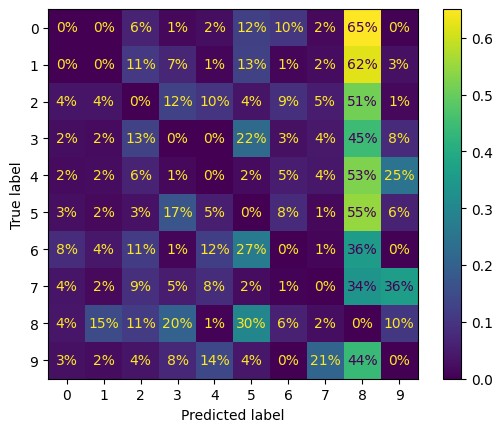

In [ ]:
"""plt.figure(figsize=(20,15))
sample_weight=(y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,
                                        normalize="true",values_format=".0%")
plt.show()"""

* artık sınıflandırıcının yaptığı hata türlerini çok daha net görebiliyoruz.
* 8 sınıfına ait sutun artık oldukça parlak görünüyor. bu da birçok görüntünün 8 olarak yanlıl sınıflandırıldığını doğruluyor.aslında bu neredeyse tüm sınıflar için en yaygın yanlış sınıflandırma durumudur

* ancak bu diyagramdaki yüzdeleri yorumlarken dikkatli olmalıyız
* bu grafikte doğru tahminler(correct predictions) hariç tutulmuştur

* örneğin  diyagramda 7. satur ve 9. sutundaki %36 değeri(tüm 7 lerin yüzde 36'sı 9 olarak yanlış sınıflandırıldı) anlamına gelmez.
* bu modelin 7'lerle ilgili yaptığı hataların %36'sı 9 olarak yanlış sınıflandırmadan oluşuyor anlamına gelir

* gerçekte 7'lerin sadece %3'ü 9 olarak yanlış sınıflandırılmıştır(bir üst diyagramda görebiliriz)


* karmaşıklık matrisini analiz etmek, genellikle sınıflandırıcı geliştirmek için değerli içgörüler sağlar
* bu grafiklere baktığımızda amacımızın yanlış 8 tahminlerini azaltmaya odaklanmak gerektiği görülüyor


* bunu yapmak için sunları deneyebiliriz
* 8'e benzeyen ama 8 olmayan rakamlar için daha fazlz eğitim verisi toplayarak,modelin bunları ayırt etmeyi öğrenmesini sağlamak
* modelin işini kolaylaştıracak yeni özellikler(features) geliştirmek(kapalı döngü sayısını hesaplayan bir algoritma yazmak)
* görüntüleri ön işlemek(preprocess images). örneğin sklearn image,Pillow veya OpenCV kullankarak. böylece kapalı döngüler gibi desenler daha belirgin hale gelir

* ayrıca tek tek hataları analiz etmek(analyzing individual errors) de sınıflandırıcının nasıl çalıştığını ve neden hata yaptığını anlamak için oldukça faydalıdır

* örneğin 3'ler ve 5'ler arasındaki karışıklıkları görselleştirmek için bu iki sınıfa ait örnekleri bir karmaşıklık matrisi biçiminde çizebiliriz

In [62]:
cl_a,cl_b="3","5"
X_aa=X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b) & (y_train_pred==cl_b)]

print(f"X_aa shape: {X_aa.shape}, X_ab shape: {X_ab.shape}, X_ba shape: {X_ba.shape}, X_bb shape: {X_bb.shape}")

plt.figure(figsize=(12, 12))
# True 3s classified as 3
if len(X_aa) > 0:
    plt.subplot(2, 2, 1)
    image_data = X_aa[0]
    plt.imshow(image_data.reshape(28, 28), cmap="binary")
    plt.title(f"True {cl_a}, Pred {cl_a} (n={len(X_aa)})")
    plt.axis("off")

# True 3s classified as 5 (errors)
if len(X_ab) > 0:
    plt.subplot(2, 2, 2)
    image_data = X_ab[0]
    plt.imshow(image_data.reshape(28, 28), cmap="binary")
    plt.title(f"True {cl_a}, Pred {cl_b} - Error (n={len(X_ab)})")
    plt.axis("off")

# True 5s classified as 3 (errors)
if len(X_ba) > 0:
    plt.subplot(2, 2, 3)
    image_data = X_ba[0]
    plt.imshow(image_data.reshape(28, 28), cmap="binary")
    plt.title(f"True {cl_b}, Pred {cl_a} - Error (n={len(X_ba)})")
    plt.axis("off")

# True 5s classified as 5
if len(X_bb) > 0:
    plt.subplot(2, 2, 4)
    image_data = X_bb[0]
    plt.imshow(image_data.reshape(28, 28), cmap="binary")
    plt.title(f"True {cl_b}, Pred {cl_b} (n={len(X_bb)})")
    plt.axis("off")

plt.tight_layout()
plt.show()

X_aa shape: (0, 784), X_ab shape: (0, 784), X_ba shape: (0, 784), X_bb shape: (0, 784)


<Figure size 1200x1200 with 0 Axes>

## Çok Etiketli Sınıflandırma(Multilabel Classification)
* Şimdiye kadar her örnek(instance), sadece tek bir sınıfa(single class) atanmıştı.Ancak bazı durumlarda,bir sınıflandırıcının her örnek için birden fazla sınıf çıktısı üretmesini isteyebiliriz

* örneğin bir yüz tanıma(face recognition) sınıflandırıcı düşünelim
* aynı fotoğrafta birden fazla kişi var model ne yapmalı?.Her tanıdığı kişi için bir etiket(tag) üretmelidir

* diyelim ki sınıflandırıcı üç kişiyi tanıyacak şekilde eğitilmiş.Alice,Bob,Charlie.Eğer sınıflandırıcıya Alice ve Charlie'nin bulunduğu bir fotoğraf gösterirse,cıktı söyle olamalı


     
     [True,False,True]


* bu şekilde birden fazla ikili etiket(binary tag) üreten sınıflandırma sistemlerine çok etiketli sınıflandırma sistemleri (multilabel classification systems) denir
* bir örnek

In [63]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>="7")
y_train_odd=(y_train.astype("int8") % 2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

In [64]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

* bu kod her rakam görüntüsü için iki hedef etiketten oluşan bir y_multilabel dizisi(array) oluşturur.İlk etiket rakamın 6 dan büyük olup olmadığını belirtir. İkinci etiket ise rakamın tek olup olmadığını gösterir

* ardından çok etiketli sınıflandırmayı destekleyen(her sınıflandırıcı bunu yapmaz) bir KNeighborsClassifier örneği oluşturulur ve bu model çoklu hedef dizisi(multiple targets array) kullanılarak eğitilir
* Artık bir tahmin yapabiliriz(model iki etiket(two labels) üretir)

In [65]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)

In [66]:
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9764102655606048

* Bu yaklaşım tüm etiketlerin eşit derecede önemli olduğunu varsayar.Ancak bu her zaman doğru olmayabilir
* Örneğin Alice'ın fotoğrafları Bob veya Charlieden cok daha fazlasysa,sınıflandırıcının Alice'e ait skoruna(classifier skor) daha fazla ağırlık verilmesi gerekebilir

* Bunun basit bir yolu, her etikete destek(support) değeri kadar ağırlık vermektir.Yani o etikete sahip örnek sayısı kadar.
* Bunu aypmak için f1_score() fonksiyonunu çağırırken average="weighted" parametresini ayarlamak yeterlidir.

* Eğer kullandığımzı sınıflandırıcı (örnek SVC) çok etiketli sınıflandırmayı doğal olarak destekelemiyorsa,bir seçenek her etiket için ayrı bir model eğitmektir
* fakat bu strateji etiketler arasındaki bağımlılıkları(dependencies between labels) yakalamakta zorlanabilir
* örneğin "büyük" bir rakamın(7,8,veya 9) tek olma olasılığı çift olma olasılığının iki katıdır;ancak "odd(tek)" etiketini tahmin eden model,"large" etiketini tahmin eden modelin ne söylediğini bilmez
* bu sorunu çözmek için modeller bir zincir halinde organize edilebilir.
* her model tahmin yaparken, girdi özelliklerine(input features) ek olarak kendinden önceki modellerin tahminlerini de kullanır.
* sklearn bunu yapan bir sınıfa sahiptir-->ClassifierChain

* varsayılan olarak,eğitim sırasında gerçek etiketleri kullanır- ve her model,zincirdeki konumuna göre uygun etiketleri alır
* ancak cv hiperparametresi ayarlanırsa,model çarpaz doğrulama kullanarak her örnek için "temiz"(clean,out-of-sample) tahminler üretir.Bu tahminler,zincirde sonraki tüm modellerin eğitiminde kullanılır

* aşağda çapraz doğrulama stratejisi(cross-validation strategy) kullanarak bir ClassifierChain modelin nasıl oluşturulacağı ve eğitileceği gösteririlir
* yine ilk 2000 görüntü kullanılacak

In [67]:
from sklearn.multioutput import ClassifierChain
chain_clf=ClassifierChain(SVC(),cv=3,random_state=42)
chain_clf.fit(X_train[:2000],y_multilabel[:2000])

chain_clf.predict([some_digit])

array([[0., 1.]])

## Multioutput Classification(Çok Çıkışlı Sınıflandırma)
* bu sınıflandırma türü çok etiketli sınıflandırmanın daha genel bir halidir. Ancak burada her etiket(label) sadece iki değil,birden fazla olası değere(multiclass) sahip olabilir

* gürültülü görüntülerden gürü giderme(denoising) yapan sistem inşa edeceğimizi düşünelim
* bu sistemin girdisi, gürültülü bir rakam görüntüsü(noisy digit image) olacak; çıktısı ise(inş) temiz bir rakam görüntüsü(clean digit image) olacaktır.tıpkı MNIST görüntülerinde olduğu gibi piksel yoğunluklarını temsil eden bir dizi array şeklinde

* bu durumda sınıflandırıcının çıktısı
* çok etiketlidir(multilabel)-> çünkü her piksel için bir etiket vardır ve 
* her etiket çok sınıflıdır-> çünkü her piksek değeri 0 ila 255 arasında değişebilir


* dolayısıyla bu sistem,cok çıkışlı sınıflandırma sistemi için iyi bir örnektir

* şimdi eğitim ve test setlerini oluşturmak için MNIST görüntülerini ele alacağız ve piksellerin yoğunluk değerlerine (pixel intensities) rastgele gürültü(noise) ekleyeceğiz
* bunu yapmak için "random number generator"'un integers() metodunu kullanacaz.
* bu işlem sonucunda hedef görüntüler(target images) orijinal,temiz görünütler,input görüntüleri ise gürültülü versiyonları olacaktır

In [69]:
rng=np.random.default_rng(seed=42)
rng.integers

<bound method Generator.integers of Generator(PCG64) at 0x1473844A0>

In [71]:
noise_train=rng.integers(0,100,(len(X_train),784))
noise_train

array([[40, 52, 66, ...,  0, 25, 57],
       [14, 96,  7, ..., 64, 35, 55],
       [76, 22, 15, ..., 97, 12, 60],
       ...,
       [22, 92, 10, ..., 23, 41, 86],
       [81, 21, 18, ...,  3, 40, 57],
       [37, 81, 10, ..., 29, 41, 18]], shape=(60000, 784))

In [73]:
X_train_mod=X_train +noise_train
X_train_mod

array([[40, 52, 66, ...,  0, 25, 57],
       [14, 96,  7, ..., 64, 35, 55],
       [76, 22, 15, ..., 97, 12, 60],
       ...,
       [22, 92, 10, ..., 23, 41, 86],
       [81, 21, 18, ...,  3, 40, 57],
       [37, 81, 10, ..., 29, 41, 18]], shape=(60000, 784))

In [74]:
noise_test=rng.integers(0,100,(len(X_test),784))
X_test_mod=X_test + noise_test
X_test_mod

array([[13, 52, 30, ..., 60, 20, 69],
       [20, 32, 27, ...,  4, 86, 64],
       [77, 24, 83, ..., 35, 65, 55],
       ...,
       [76, 15,  4, ..., 23, 50, 43],
       [10, 67, 47, ..., 70, 60, 69],
       [41, 89, 82, ..., 98, 15, 58]], shape=(10000, 784))

In [75]:
y_train_mod=X_train
y_test_mod=X_test

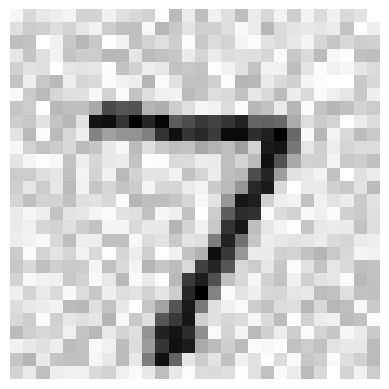

In [77]:
plot_digit(X_test_mod[0])

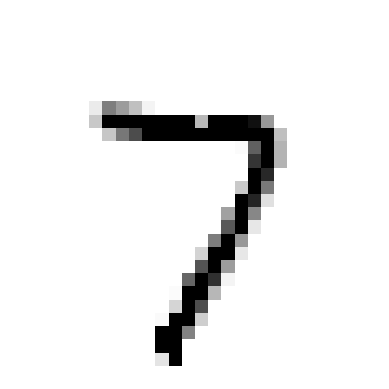

In [76]:
#train 
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

* istediğimize oldukça yakın görünüyor